In [1]:
# import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\CHETAN\OneDrive\Desktop\Census Income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# check information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


no null value present 
age , fnwgt , education_num, capaital_gain, capital_loss, and hours_per_week is integer datatype
remaining is object datatype features

In [4]:
# check null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
# check duplicate values
df.duplicated().sum()

24

In [6]:
# drop duplicate values 
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
# check unique value and whitespaces 
for i in df:
    x = df[i].value_counts()
    print('\n','=='*30)
    print(x)


36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: 

workclass, occupation and native_country present ? 

In [9]:
df['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [11]:
df['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [12]:
# check unique value
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
# delect '?' from feature
df.drop(df[df['Workclass'] == ' ?'].index,inplace=True)

In [14]:
# check uniue value
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [15]:
# delect '?' from feature
df.drop(df[df['Native_country']==' ?'].index,inplace=True)

In [16]:
# check unique value
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

In [17]:
# delect '?' from feature
df.drop(df[df['Occupation']==' ?'].index,inplace=True)

In [18]:
# check shape
df.shape

(30138, 15)

In [19]:
# convert object to int datatype usning labelencoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [20]:
# seprate int data and object datatype in two seprate variable
object_data = []
numric_data =[]

for i in df:
    if df[i].dtype == 'O':
        object_data.append(i)
    else:
        numric_data.append(i)
    

In [21]:
# convert object data type 
for i in df[object_data]:
    df[i] = lb.fit_transform(df[[i]])
df[object_data]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,4,9,2,3,0,4,1,38,0
1,2,11,0,5,1,4,1,38,0
2,2,1,2,5,0,2,1,38,0
3,2,9,2,9,5,2,0,4,0
4,2,12,2,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,2,7,2,12,5,4,0,38,0
32556,2,11,2,6,0,4,1,38,1
32557,2,11,6,0,4,4,0,38,0
32558,2,11,4,0,3,4,1,38,0


In [22]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [23]:
# check statustic 
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,30138.000000,30138.000000,3.013800e+04,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000
mean,38.441702,2.199316,1.897988e+05,10.333101,10.122437,2.579667,5.960515,1.418508,3.678512,0.675725,1092.805329,88.442863,40.934734,36.384730,0.249054
std,13.131643,0.954096,1.056584e+05,3.812113,2.548727,1.498085,4.029988,1.601654,0.834798,0.468111,7409.230902,404.451628,11.978951,6.103035,0.432473
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176295e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784190e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376062e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Age litile right skewness present 

fnlwgt feature is right skewness present and diffrance in 75% and max 

capital_gain feature skewness and min , median and 75% is zero and outlier present 

capital_loss feature skewness present and min, median and 75% is zero and outlier present 

hour_per_week is right skewness present 

In [24]:
# check skewness value 
df.skew()

Age                0.528967
Workclass          1.154120
Fnlwgt             1.460047
Education         -0.945155
Education_num     -0.302794
Marital_status    -0.008625
Occupation         0.110330
Relationship       0.820044
Race              -2.506586
Sex               -0.750833
Capital_gain      11.897934
Capital_loss       4.524323
Hours_per_week     0.332373
Native_country    -4.183022
Income             1.160593
dtype: float64

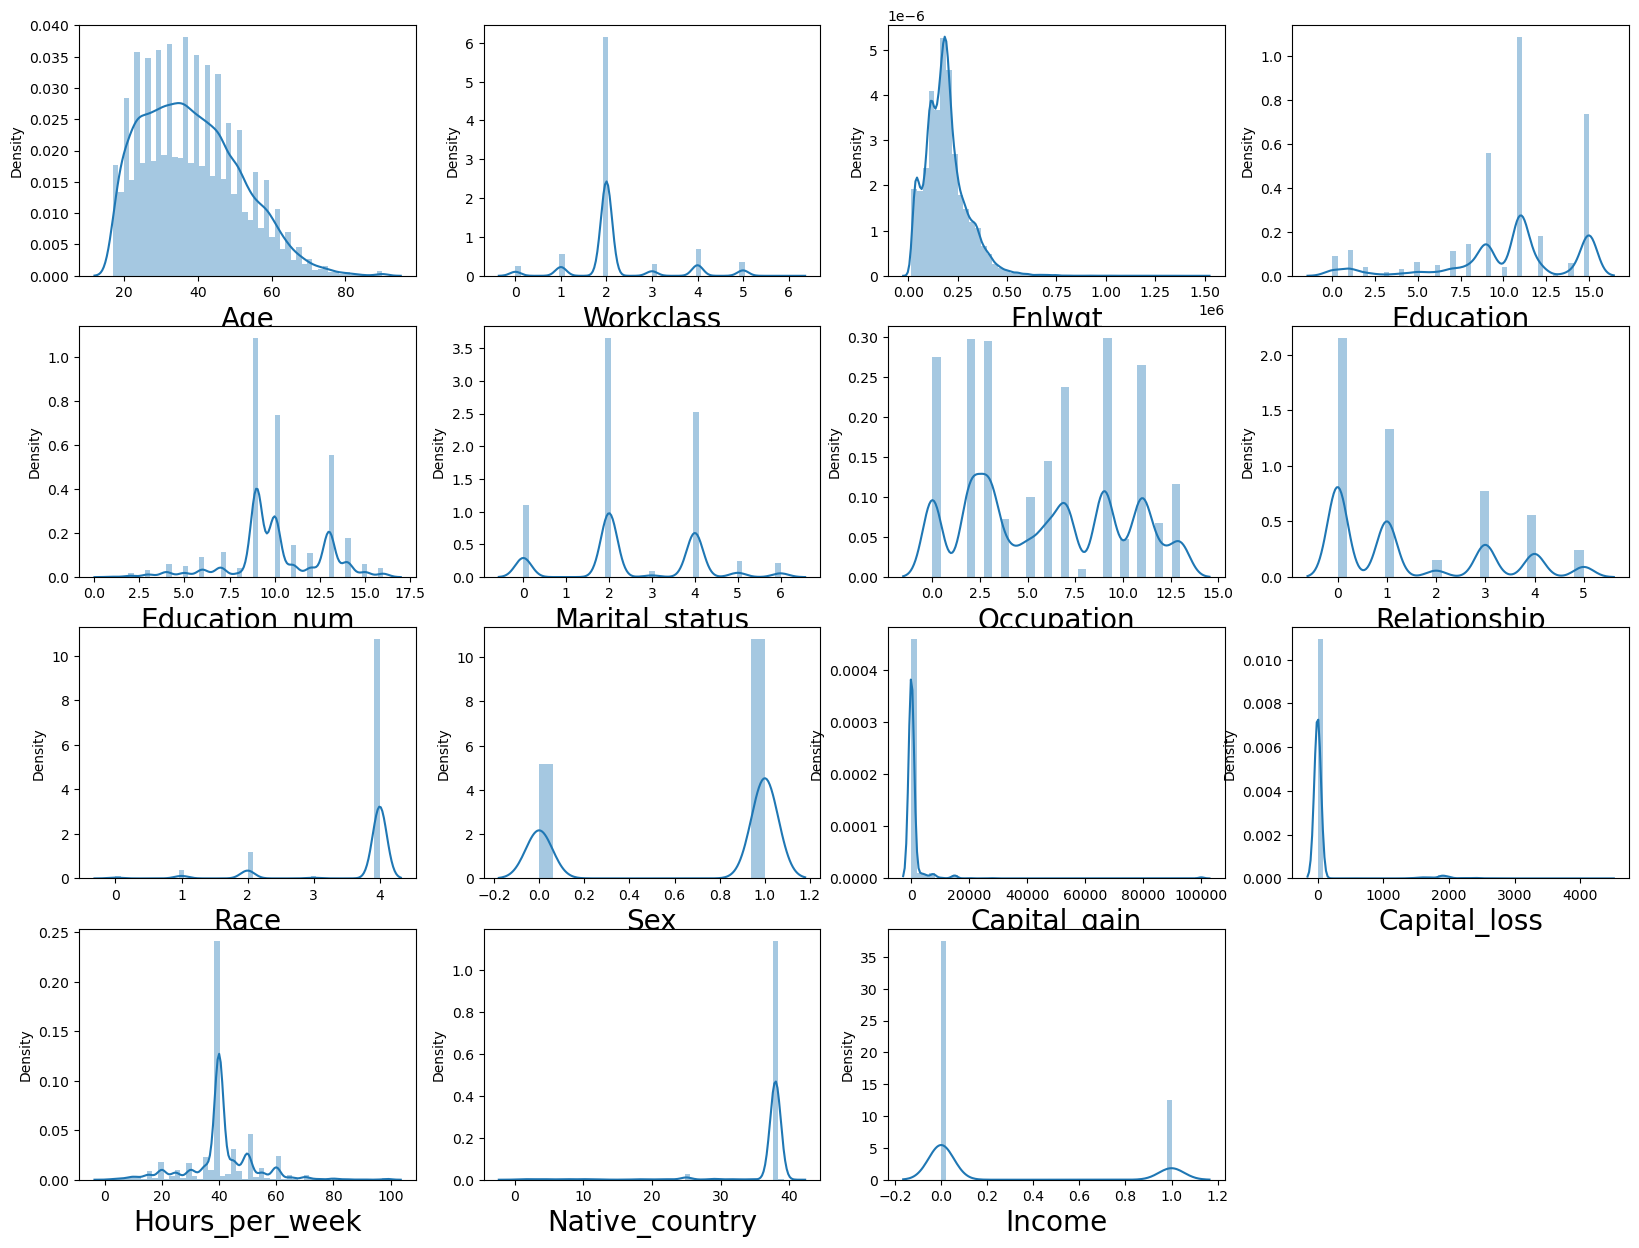

In [25]:
# check data distribution 
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

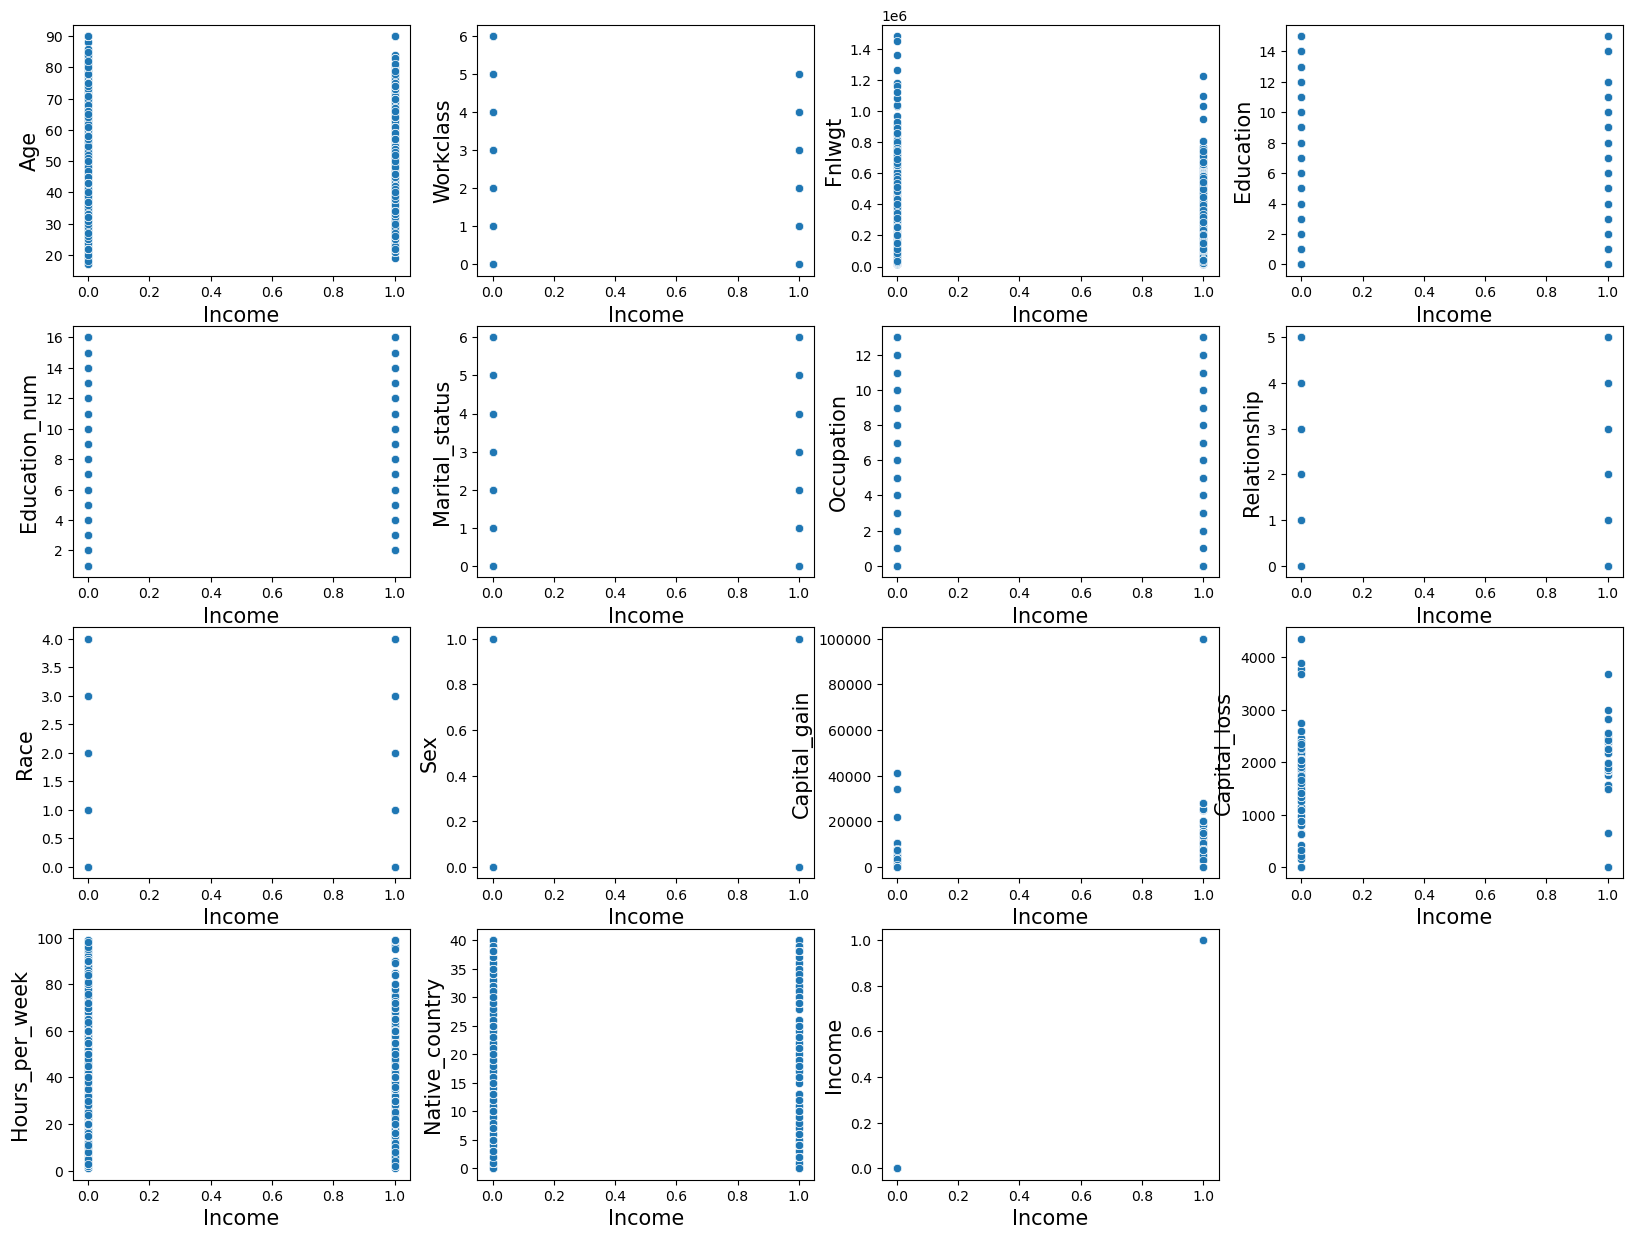

In [26]:
# check feature and label realationship 
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.scatterplot(data =df ,x='Income',y=i)
        plt.ylabel(i,fontsize=15)
        plt.xlabel('Income',fontsize=15)
        
    plotnumber+=1
plt.show()

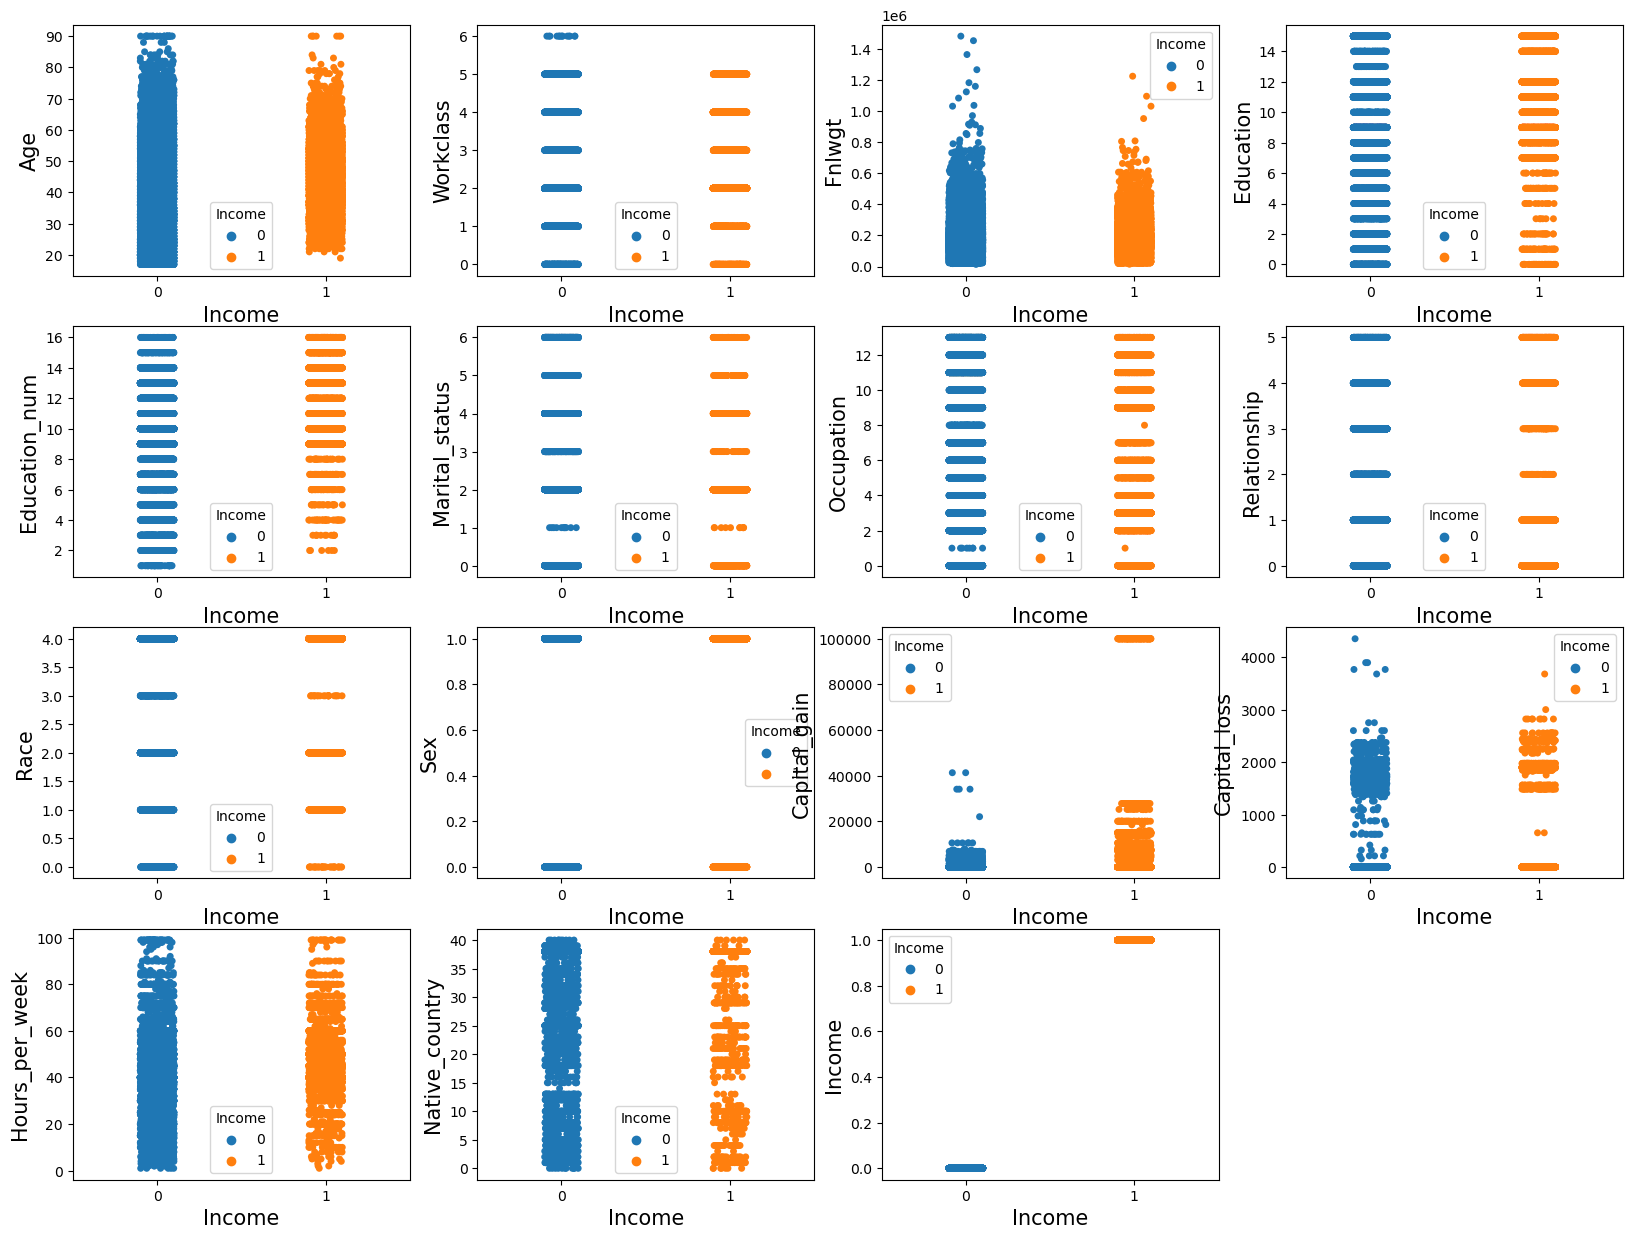

In [27]:
# check feature and label relationship usning stripplot
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.stripplot(data=df,x='Income',y=i,hue='Income')
        plt.ylabel(i,fontsize=15)
        plt.xlabel('Income',fontsize=15)
    plotnumber+=1
plt.show()

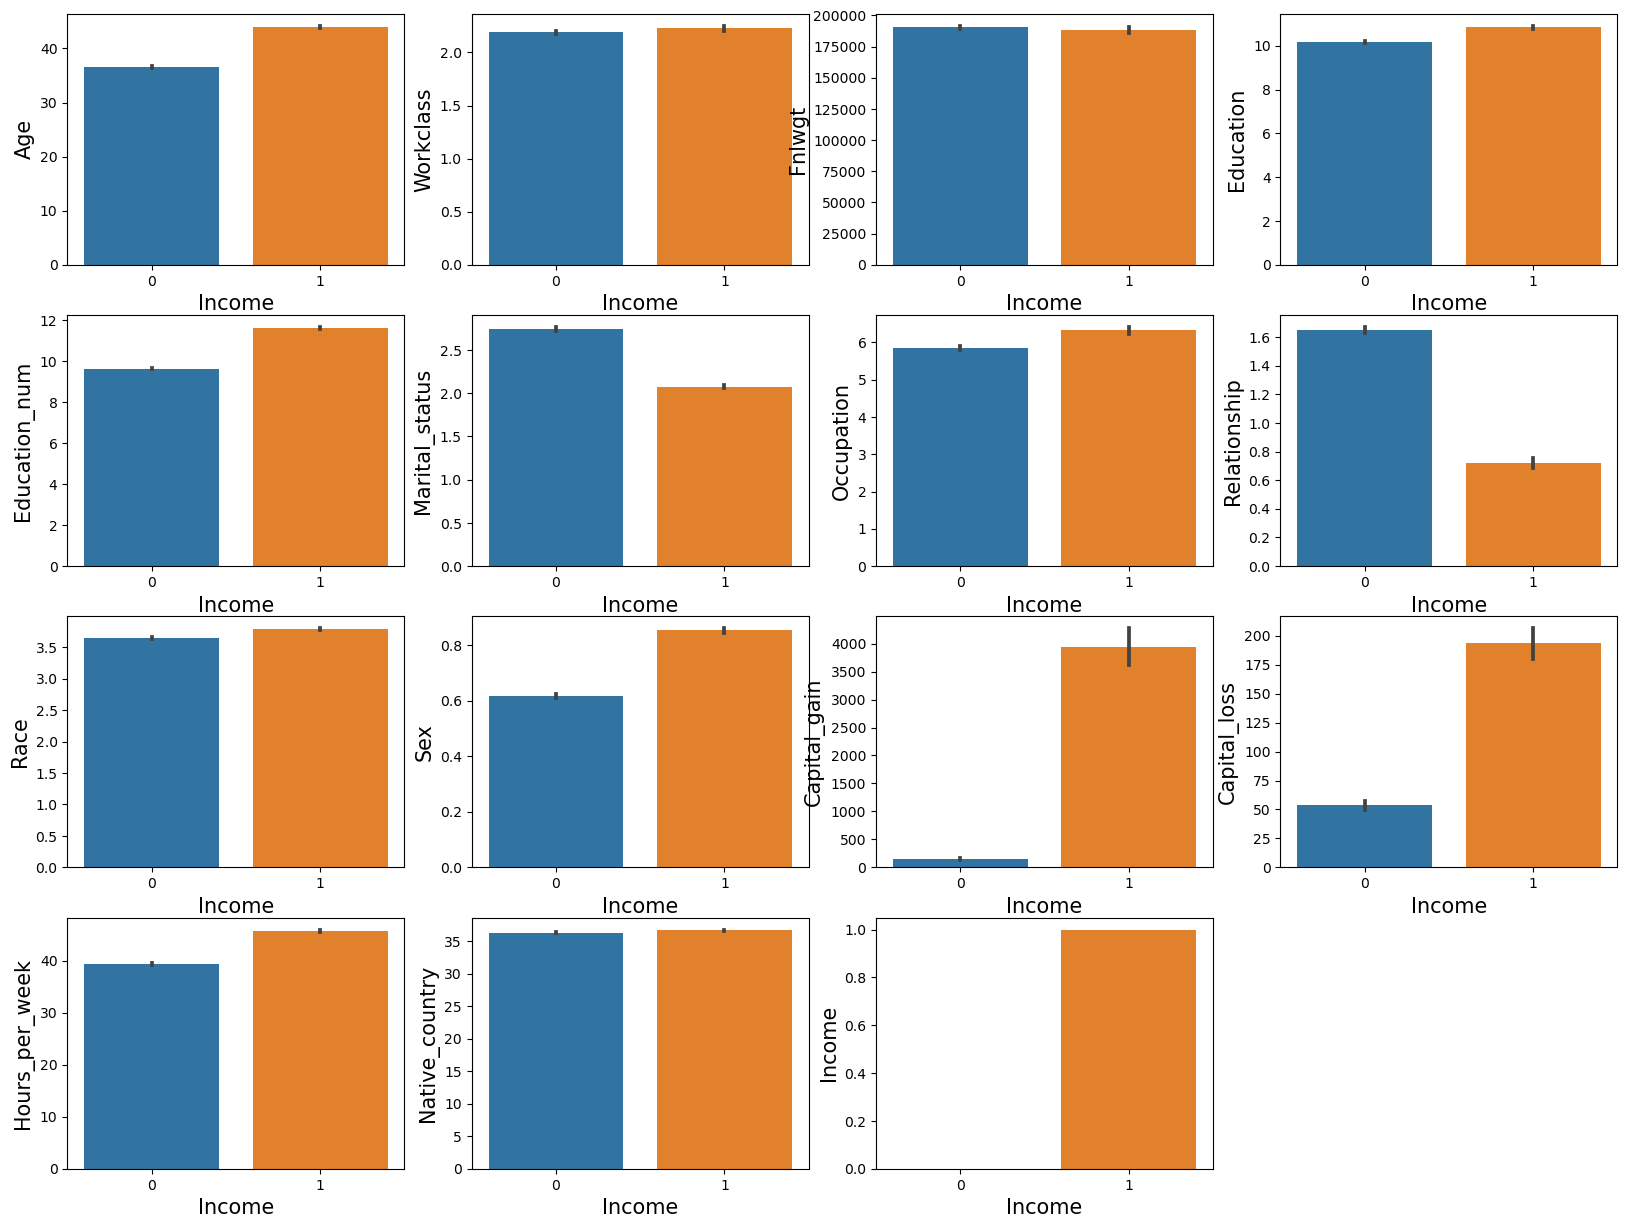

In [28]:
# check feature and label realationship using barplot
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.barplot(data=df,x='Income',y=i)
        plt.xlabel('Income',fontsize=15)
        plt.ylabel(i,fontsize=15)
    plotnumber+=1
plt.show()

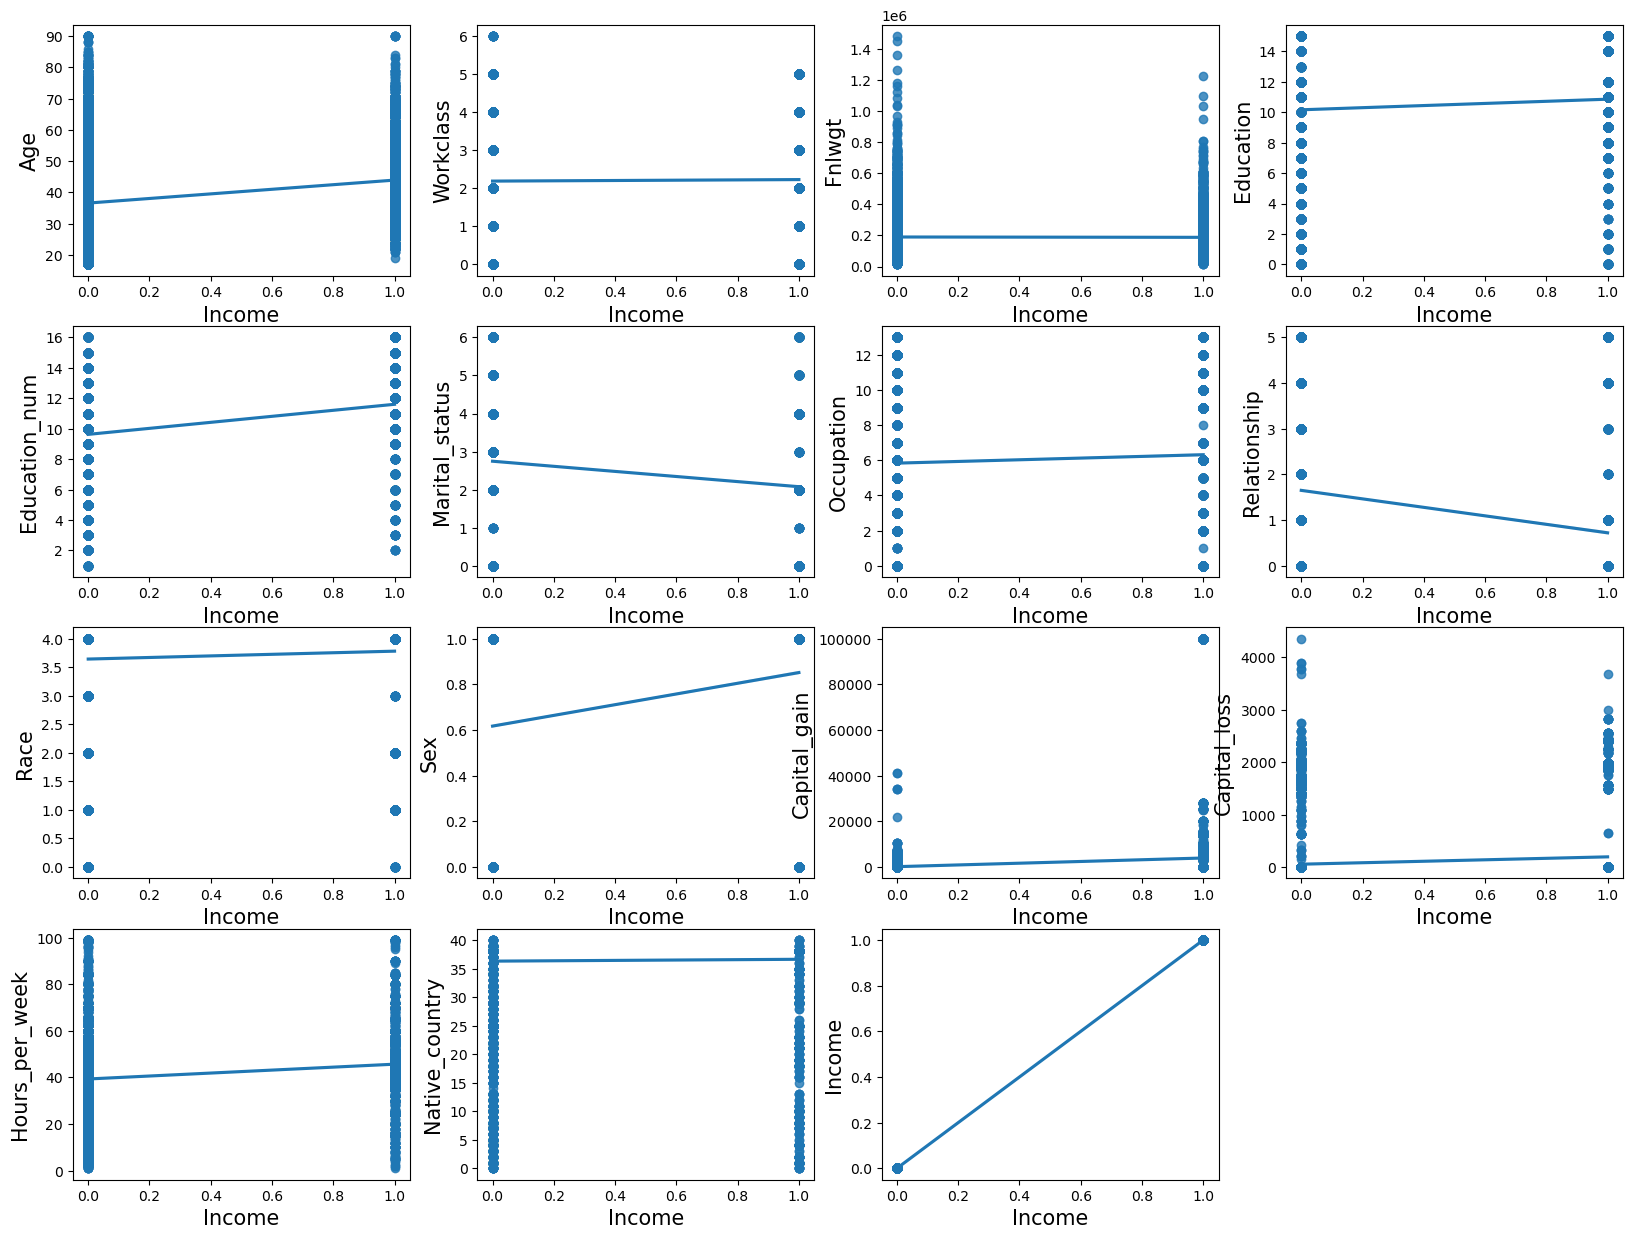

In [29]:
# check best fit line usnig regplot
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.regplot(data=df,x='Income',y=i)
        plt.xlabel('Income',fontsize=15)
        plt.ylabel(i,fontsize=15)
    plotnumber+=1
plt.show()

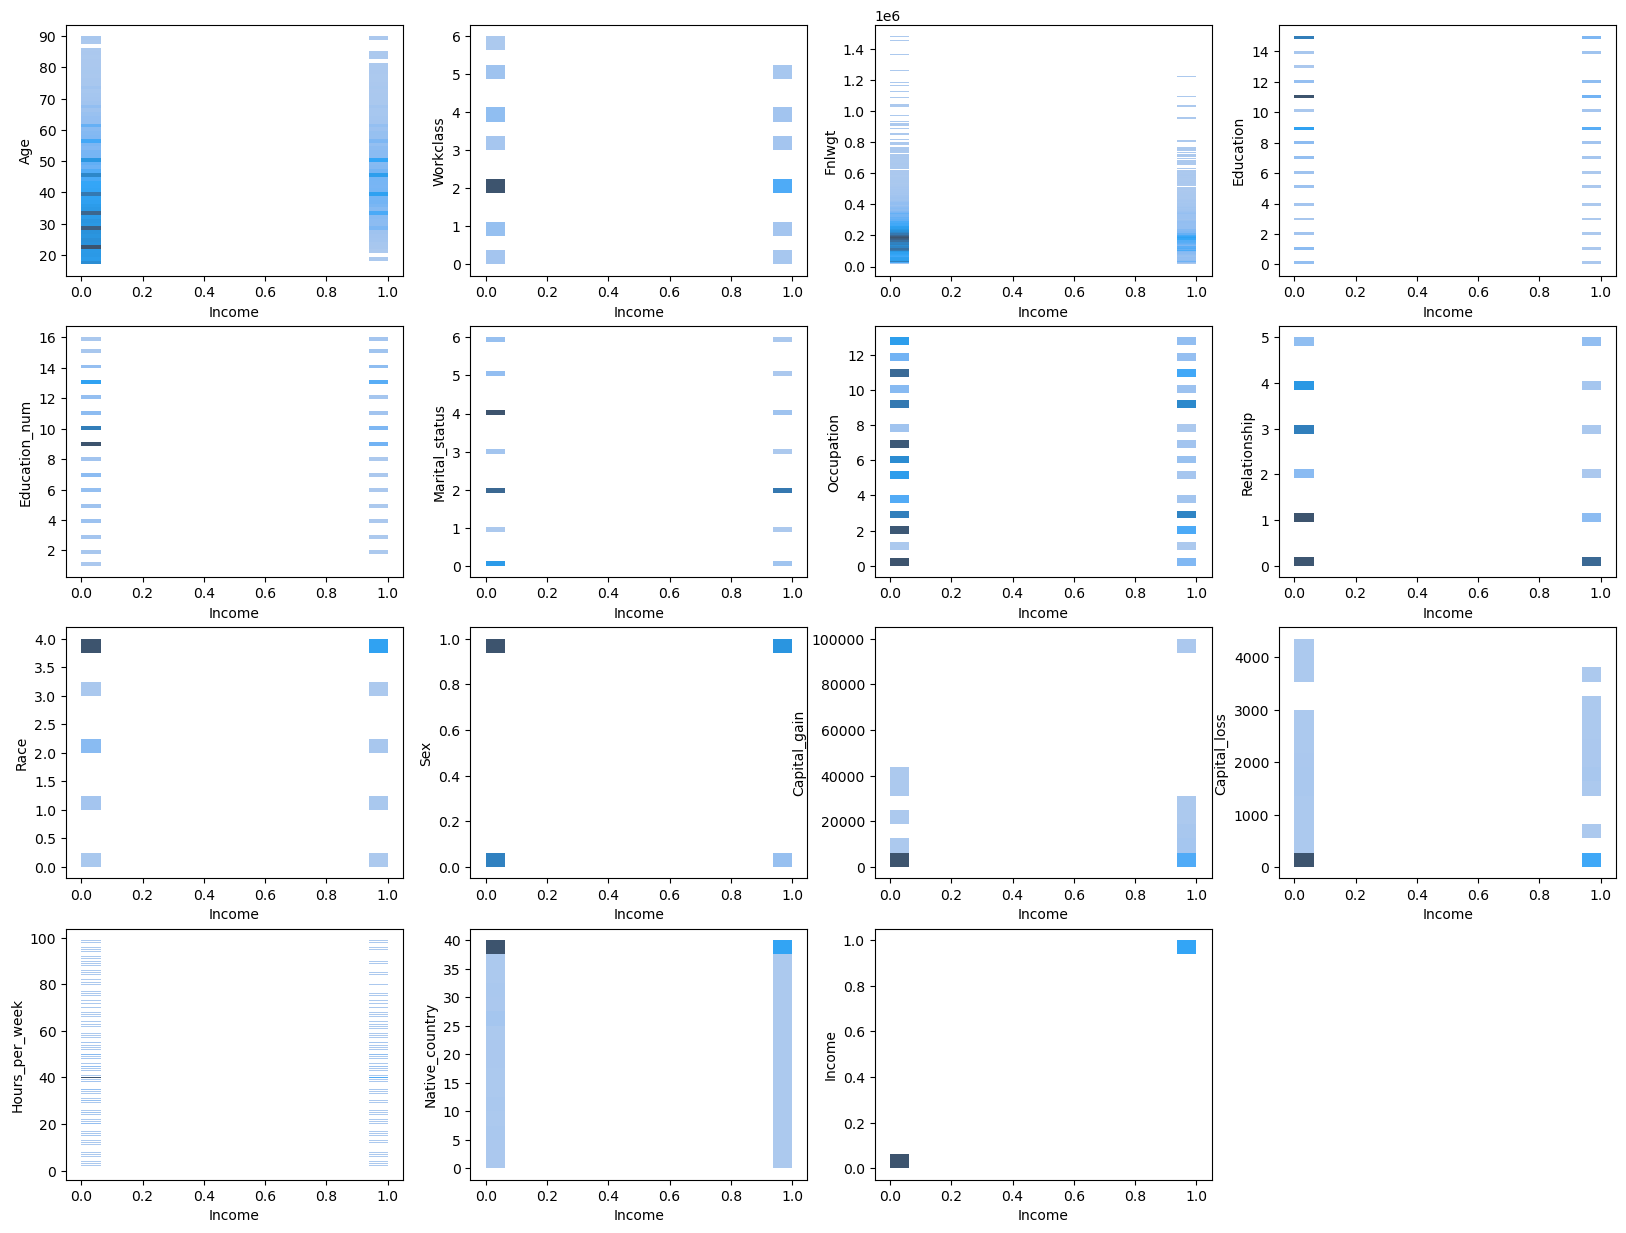

In [30]:
# check relation feauture and label usning histplot
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.histplot(data=df,x='Income',y=i)
    plotnumber+=1
plt.show()

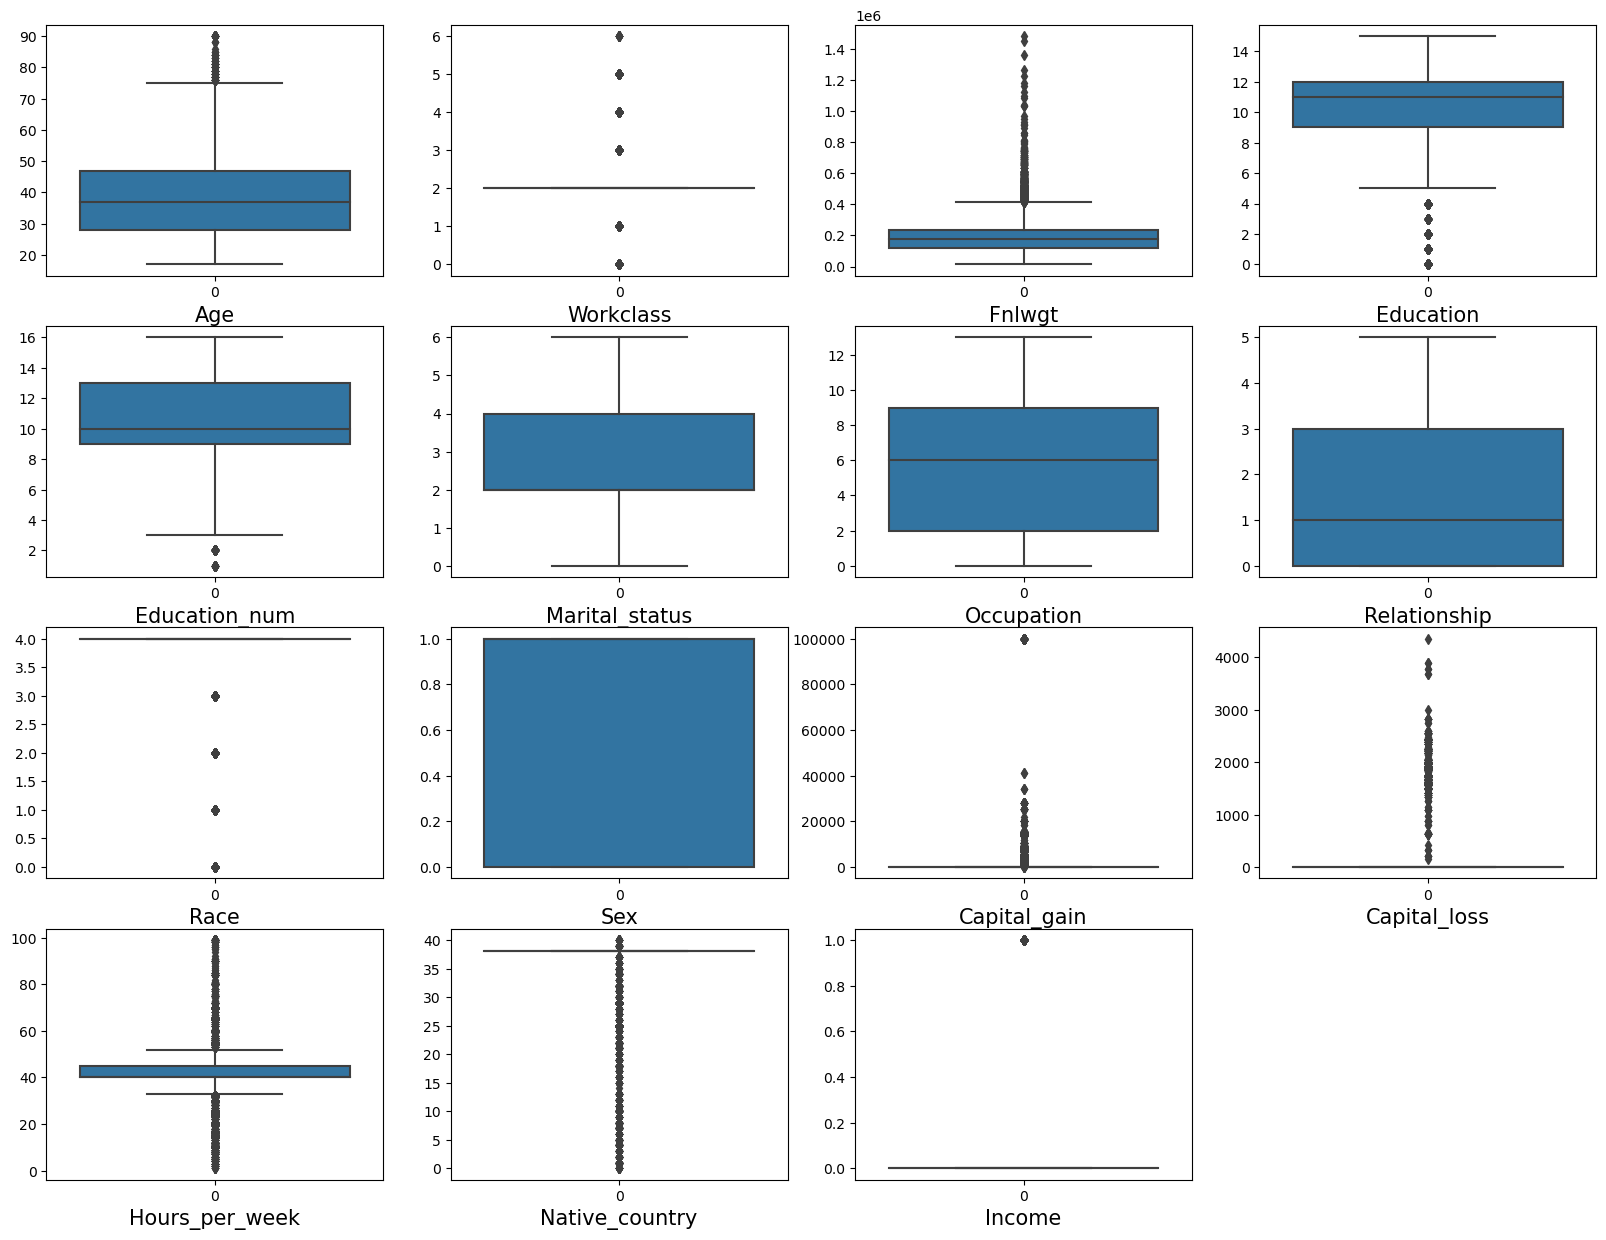

In [31]:
# check outlier usning boxplot
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

In [32]:
# keep outlier in normalized form using powertransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [33]:
# apply powertransformer in continous feature
df['Age'] = pt.fit_transform(df[['Age']])
df['Fnlwgt'] = pt.fit_transform(df[['Fnlwgt']])
df['Capital_gain'] = pt.fit_transform(df[['Capital_gain']])
df['Capital_loss'] = pt.fit_transform(df[['Capital_loss']])
df['Hours_per_week'] = pt.fit_transform(df[['Hours_per_week']])

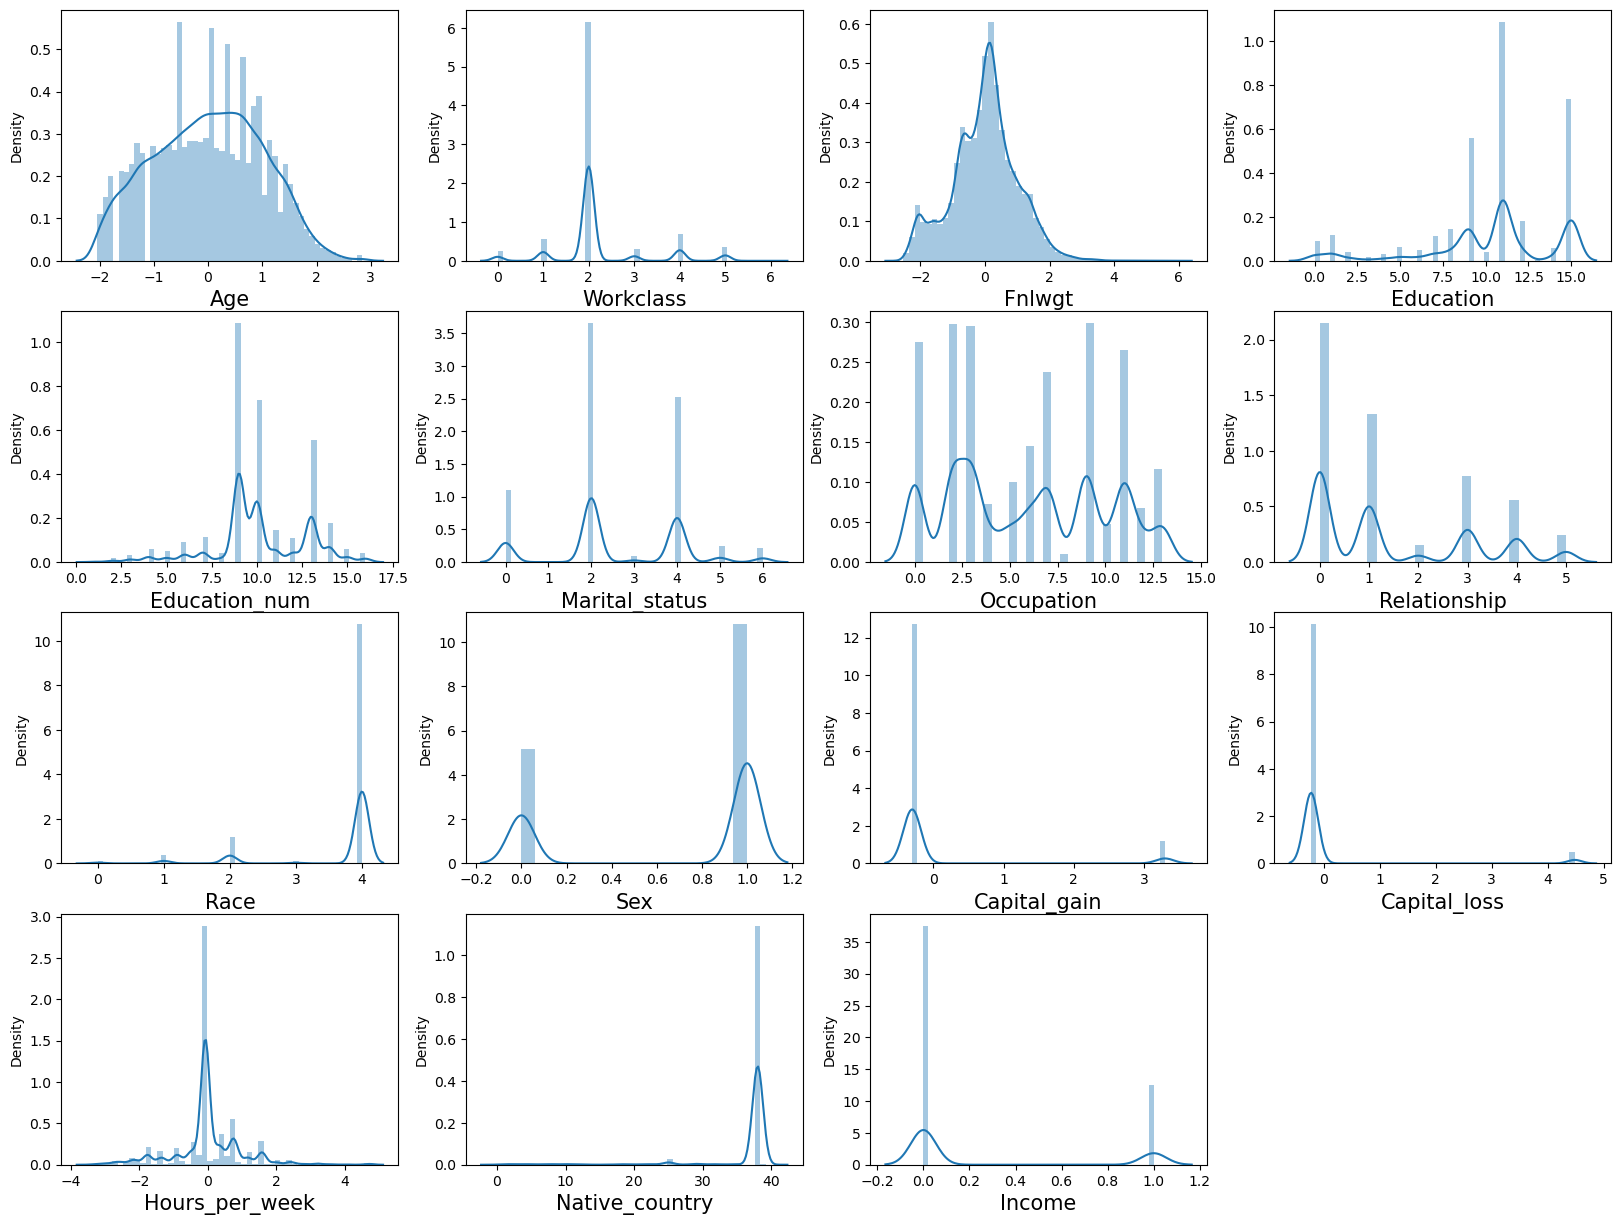

In [34]:
# check data distribution
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

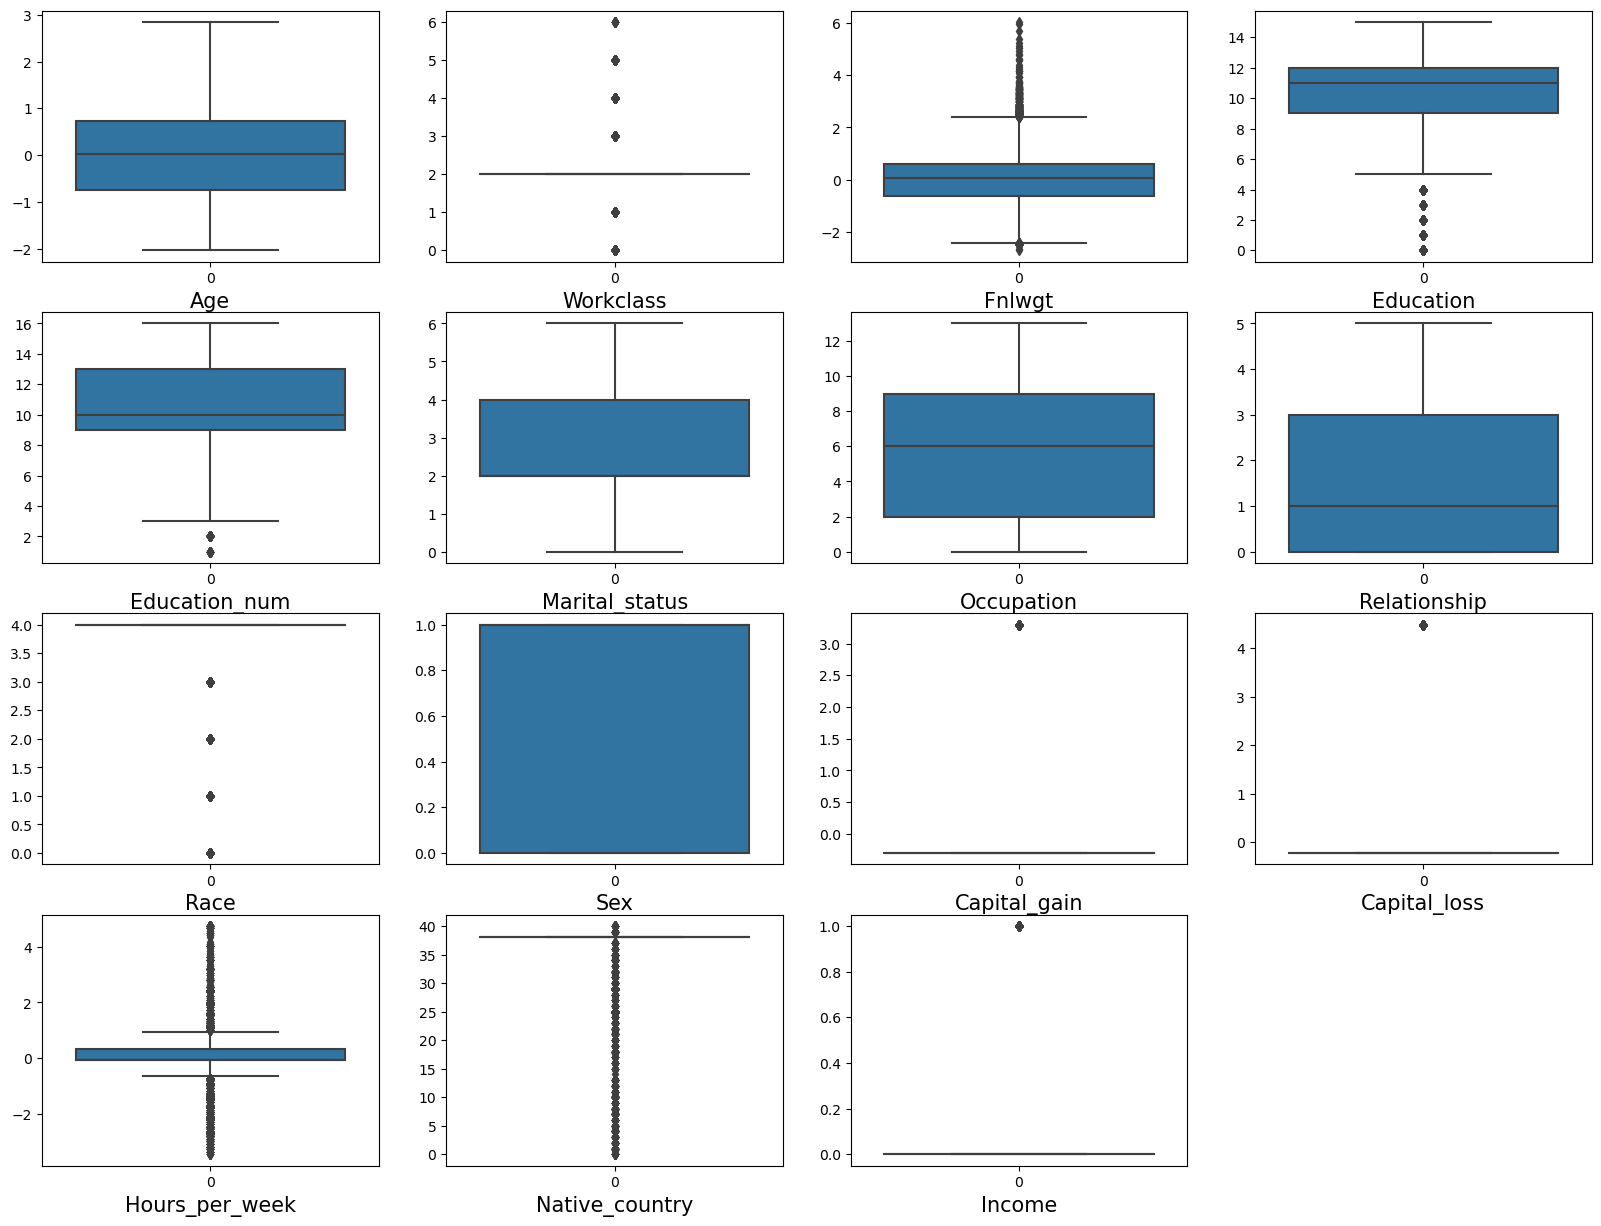

In [35]:
# check outlier unsing boxplot
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

fnlwgt, capital_gain , capital_loss and hours_per_week present outlier ... we delect outlier usning iqr method

In [36]:
fnlwgt_iqr = df['Fnlwgt'].quantile(0.75) - df['Fnlwgt'].quantile(0.25)
fnlwgt_high = df['Fnlwgt'].quantile(0.75) + (1.5 * fnlwgt_iqr)
fnlwgt_index = np.where(df['Fnlwgt']>fnlwgt_high)
df.drop(df.index[fnlwgt_index],inplace=True)

In [37]:
fnlwgt_low = df['Fnlwgt'].quantile(0.25) - (1.5 * fnlwgt_iqr)
fnlgwt_inded = np.where(df['Fnlwgt']<fnlwgt_low)
df.drop(df.index[fnlgwt_inded],inplace=True)

In [38]:
gain_iqr = df['Capital_gain'].quantile(0.75) - df['Capital_gain'].quantile(0.25)
gain_high = df['Capital_gain'].quantile(0.75) + (1.5 * gain_iqr)
gain_index = np.where(df['Capital_gain']>gain_high)
df.drop(df.index[gain_index],inplace=True)

In [39]:
loss_iqr = df['Capital_loss'].quantile(0.75) - df['Capital_loss'].quantile(0.25)
loss_high = df['Capital_loss'].quantile(0.75) + (1.5 * loss_iqr)
loss_index = np.where(df['Capital_loss']>loss_high)
df.drop(df.index[loss_index],inplace=True)

In [40]:
week_iqr = df['Hours_per_week'].quantile(0.75) - df['Hours_per_week'].quantile(0.25)
week_high = df['Hours_per_week'].quantile(0.75) + (1.5 * week_iqr)
week_index = np.where(df['Hours_per_week']>week_high)
df.drop(df.index[week_index],inplace=True)

In [41]:
week_low = df['Hours_per_week'].quantile(0.25) - (1.5 * week_iqr)
week_inded = np.where(df['Hours_per_week']<week_low)
df.drop(df.index[week_inded],inplace=True)
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,1,0.100709,2,0.398959,11,9,0,5,1,4,1,-0.303178,-0.22294,-0.071225,38,0
1,2,1.101986,2,0.562606,1,7,2,5,0,2,1,-0.303178,-0.22294,-0.071225,38,0
2,3,-0.757668,2,1.339438,9,13,2,9,5,2,0,-0.303178,-0.22294,-0.071225,4,0
3,4,0.023468,2,0.956789,12,14,2,3,5,4,0,-0.303178,-0.22294,-0.071225,38,0
4,6,1.042752,4,0.345716,11,9,2,3,0,4,1,-0.303178,-0.22294,0.344695,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,32553,1.101986,2,1.225861,12,14,2,3,0,4,1,-0.303178,-0.22294,-0.071225,38,1
19218,32554,-1.395816,2,1.143380,15,10,4,10,1,4,1,-0.303178,-0.22294,-0.071225,38,0
19219,32555,-0.856120,2,0.746617,7,12,2,12,5,4,0,-0.303178,-0.22294,-0.238207,38,0
19220,32556,0.250517,2,-0.192748,11,9,2,6,0,4,1,-0.303178,-0.22294,-0.071225,38,1


In [42]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1,0.100709,2,0.398959,11,9,0,5,1,4,1,-0.303178,-0.22294,-0.071225,38,0
2,1.101986,2,0.562606,1,7,2,5,0,2,1,-0.303178,-0.22294,-0.071225,38,0
3,-0.757668,2,1.339438,9,13,2,9,5,2,0,-0.303178,-0.22294,-0.071225,4,0
4,0.023468,2,0.956789,12,14,2,3,5,4,0,-0.303178,-0.22294,-0.071225,38,0
6,1.042752,4,0.345716,11,9,2,3,0,4,1,-0.303178,-0.22294,0.344695,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,1.101986,2,1.225861,12,14,2,3,0,4,1,-0.303178,-0.22294,-0.071225,38,1
32554,-1.395816,2,1.143380,15,10,4,10,1,4,1,-0.303178,-0.22294,-0.071225,38,0
32555,-0.856120,2,0.746617,7,12,2,12,5,4,0,-0.303178,-0.22294,-0.238207,38,0
32556,0.250517,2,-0.192748,11,9,2,6,0,4,1,-0.303178,-0.22294,-0.071225,38,1


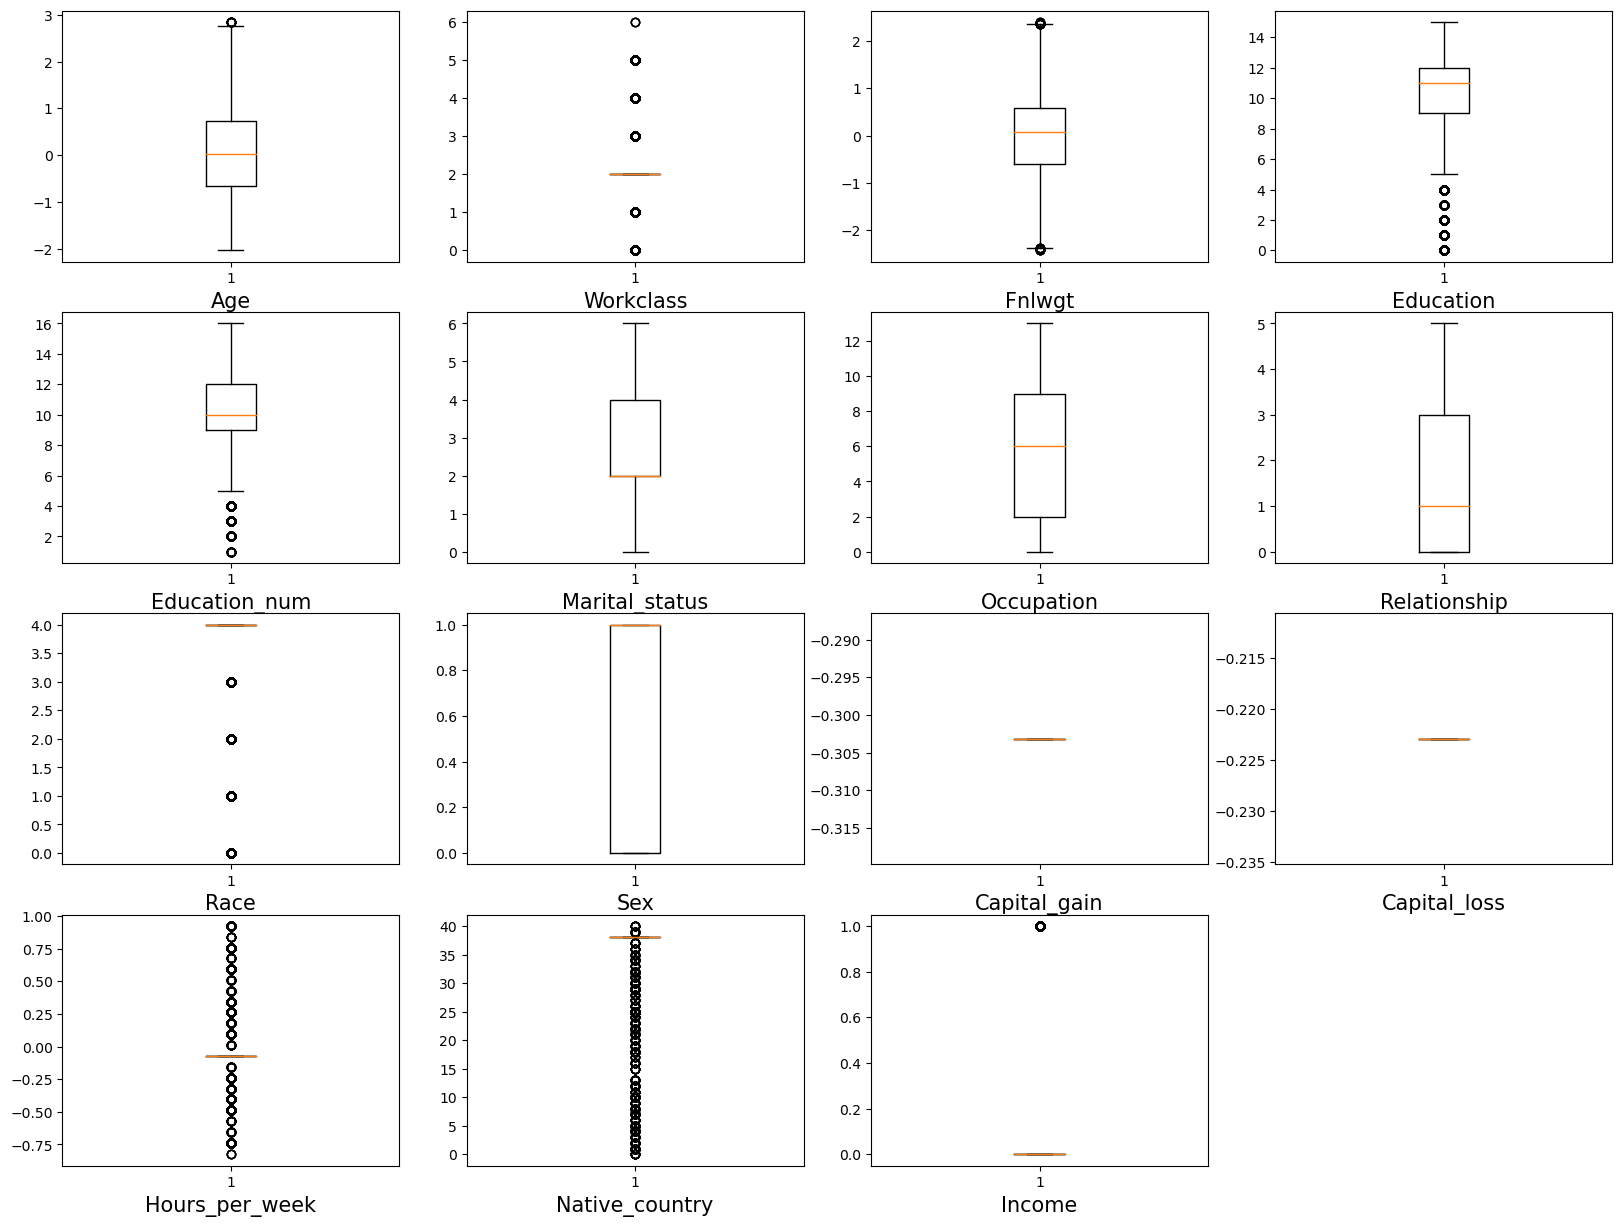

In [43]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        plt.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

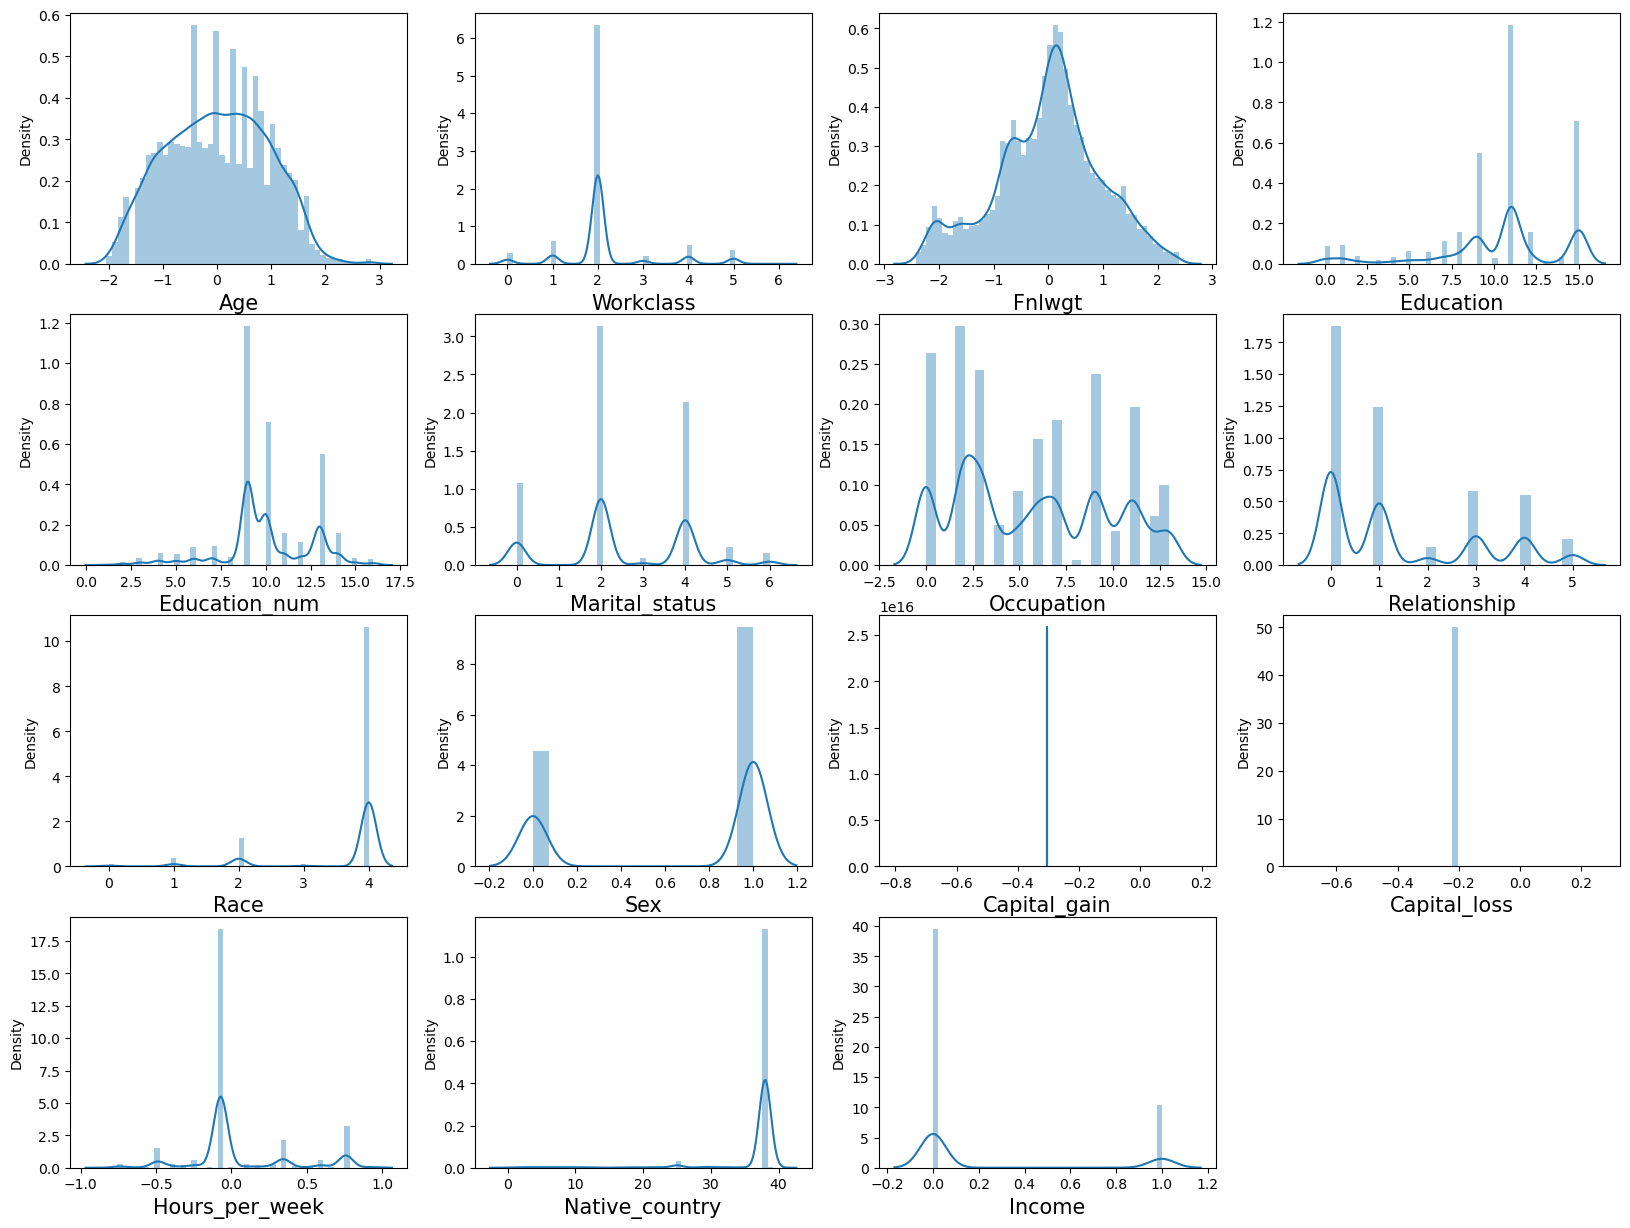

In [44]:
plt.figure(figsize=(20,15))
plotnumber=1

for i in df:
    if plotnumber<=15:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

In [46]:
# seprate feauture and label
x = df.drop('Income',axis=1)
y = df['Income']

In [47]:
# check relation feature and label 
x.corrwith(y)

Age               2.435186e-01
Workclass        -1.252537e-03
Fnlwgt           -4.980405e-03
Education         6.685305e-02
Education_num     2.903354e-01
Marital_status   -1.563608e-01
Occupation        5.573822e-02
Relationship     -2.250170e-01
Race              7.226079e-02
Sex               1.962336e-01
Capital_gain               NaN
Capital_loss     -6.812710e-17
Hours_per_week    1.774905e-01
Native_country    1.553840e-02
dtype: float64

<Axes: >

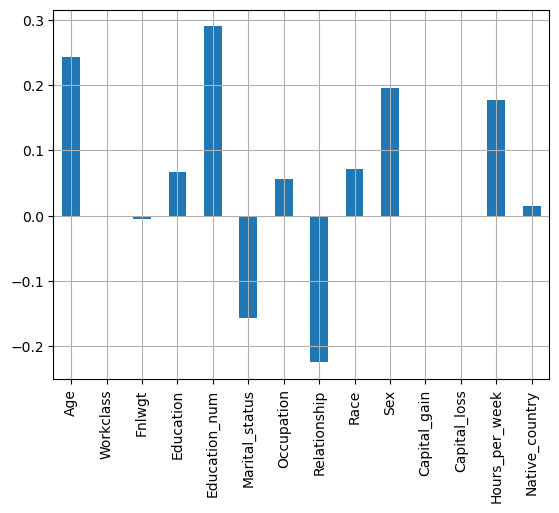

In [48]:
# check feature and label usning graph
x.corrwith(y).plot(kind='bar',grid=True)

age, education, education_num, occupation,race,sex,hour_per_week and native_country is possitive relation with label

marital_status and relationship is negative raltion with label

workclass, fnlwgt , capital_gain and capital_loss is no contribute to label

In [49]:
# check feauture vs feature and label relation 
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.051150,-0.079190,-0.027057,0.017155,-0.308001,-0.000311,-0.210146,0.007220,0.049414,NaN,NaN,0.054685,-0.000529,0.243519
Workclass,0.051150,1.000000,-0.029210,-0.000790,0.025205,-0.020791,0.027743,-0.055897,0.043690,0.059595,NaN,NaN,0.054939,0.006739,-0.001253
Fnlwgt,-0.079190,-0.029210,1.000000,-0.025946,-0.048811,0.033607,0.001837,0.008427,-0.006099,0.023254,NaN,NaN,-0.022468,-0.080491,-0.004980
Education,-0.027057,-0.000790,-0.025946,1.000000,0.333311,-0.020976,-0.041478,0.016401,0.009761,-0.042833,NaN,NaN,0.036070,0.097986,0.066853
Education_num,0.017155,0.025205,-0.048811,0.333311,1.000000,-0.014574,0.092425,-0.050128,0.022826,-0.032904,NaN,NaN,0.127611,0.110669,0.290335
Marital_status,-0.308001,-0.020791,0.033607,-0.020976,-0.014574,1.000000,0.025577,0.143612,-0.075571,-0.072674,NaN,NaN,-0.083557,-0.028504,-0.156361
Occupation,-0.000311,0.027743,0.001837,-0.041478,0.092425,0.025577,1.000000,-0.072425,0.002646,0.085684,NaN,NaN,0.059208,-0.002621,0.055738
Relationship,-0.210146,-0.055897,0.008427,0.016401,-0.050128,0.143612,-0.072425,1.000000,-0.125958,-0.578195,NaN,NaN,-0.178855,-0.012566,-0.225017
Race,0.007220,0.043690,-0.006099,0.009761,0.022826,-0.075571,0.002646,-0.125958,1.000000,0.102998,NaN,NaN,0.094095,0.118551,0.072261
Sex,0.049414,0.059595,0.023254,-0.042833,-0.032904,-0.072674,0.085684,-0.578195,0.102998,1.000000,NaN,NaN,0.180515,0.004115,0.196234


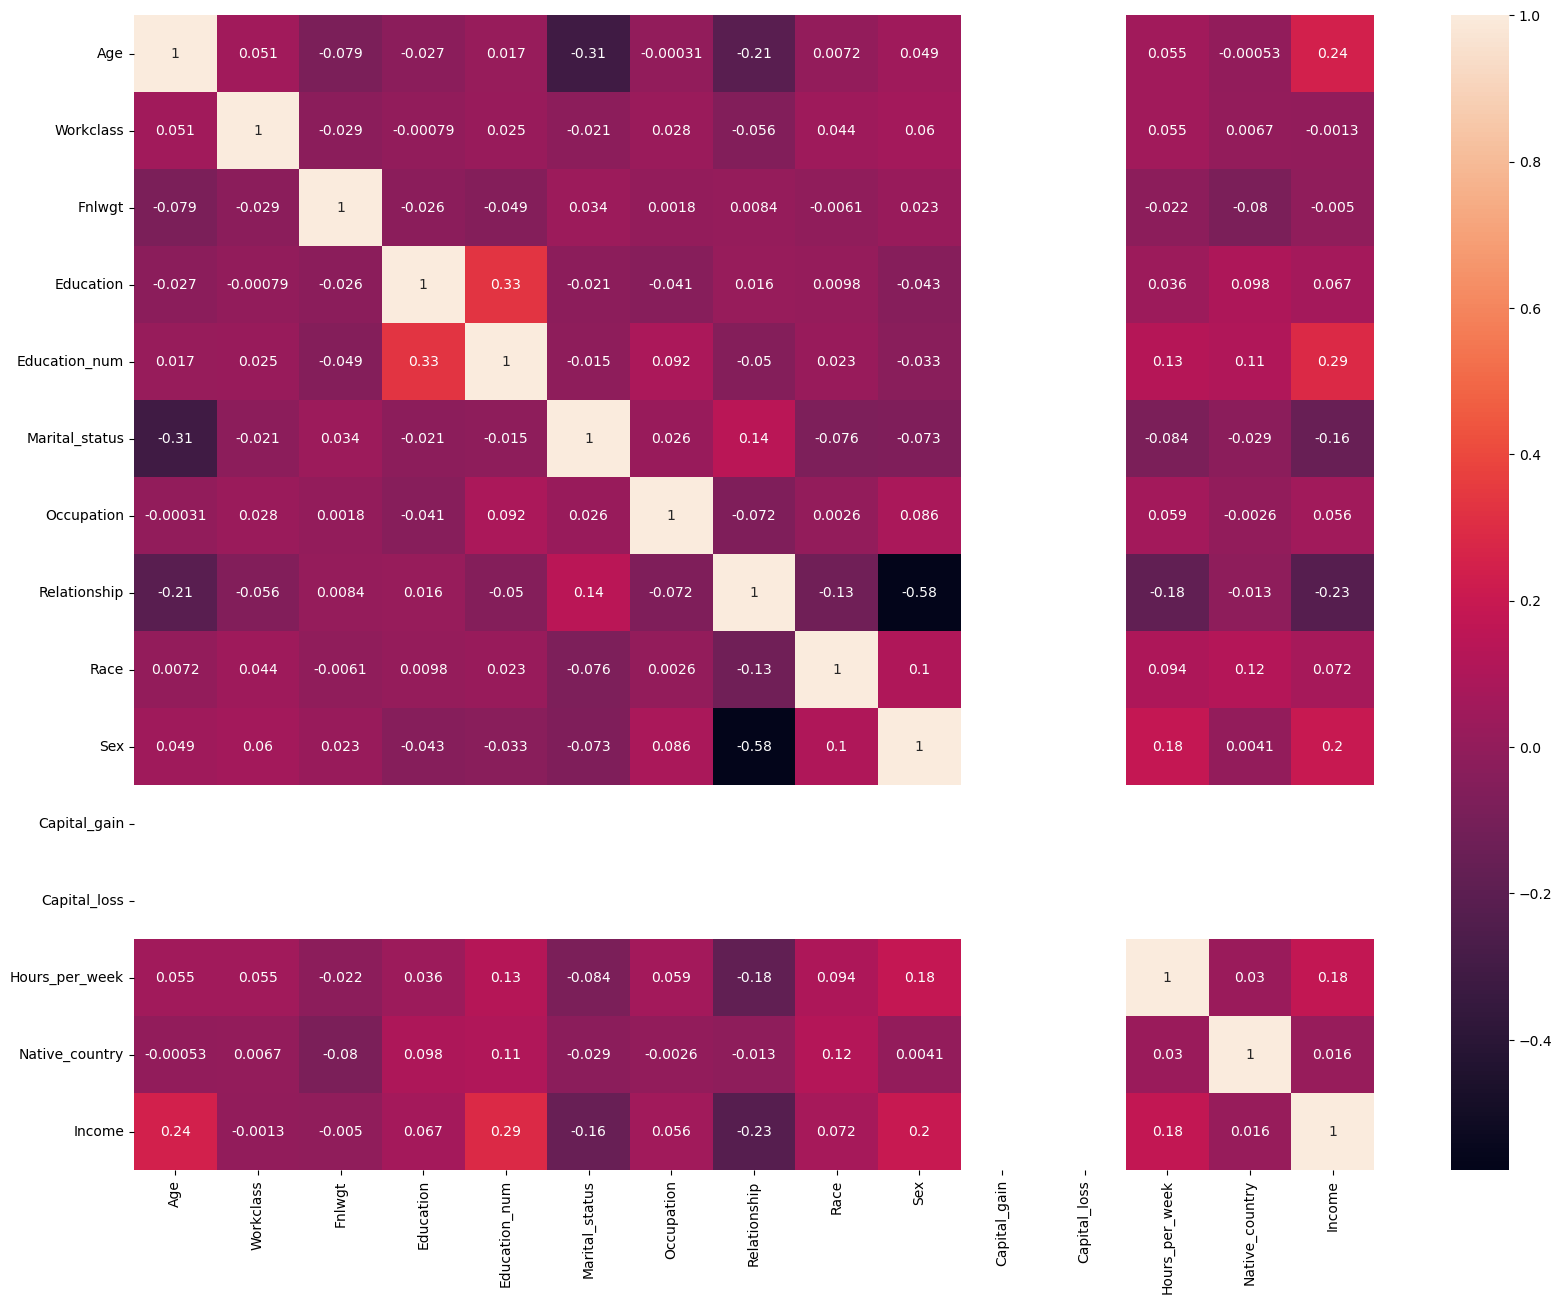

In [50]:
# check relation feature vs feature and check multicolinearity 
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.yticks(rotation=0)
plt.show()

In [51]:
# delect capital_gain and capital_loss feauture
df.drop('Capital_gain',axis=1,inplace=True)
df.drop('Capital_loss',axis=1,inplace=True)

In [71]:
# delect workclass and fnlwgt feature
df.drop('Workclass',axis=1,inplace=True)
df.drop('Fnlwgt',axis=1,inplace=True)

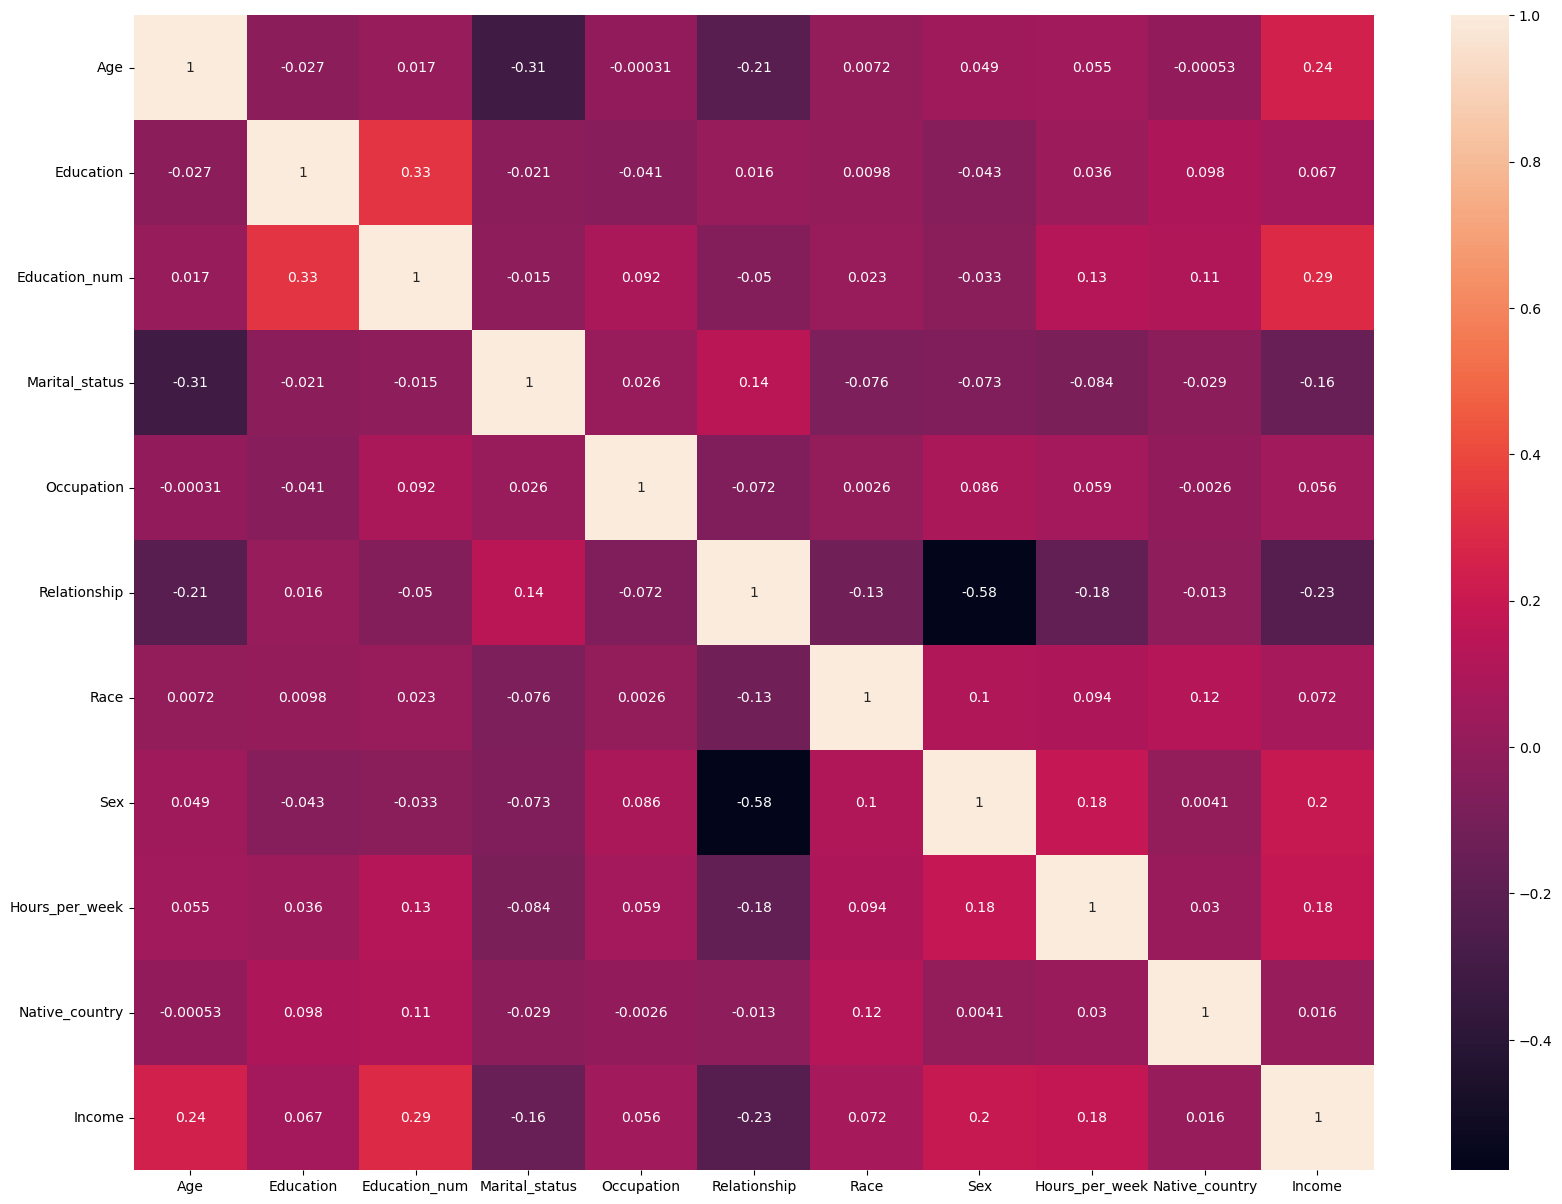

In [72]:
# check multicolinearity usning heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.yticks(rotation=0)
plt.show()

In [73]:
# check muliticolinearity usning variance inflation factor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# seprate feature and label
x = df.drop('Income',axis=1)
y = df['Income']

In [75]:
scaled = StandardScaler()
scal = pd.DataFrame(scaled.fit_transform(x),columns=x.columns)

In [76]:
# check vif value
v = []
for i in range(scal.shape[1]):
    x = variance_inflation_factor(scal,i)
    v.append(x)
vif = pd.DataFrame()
vif['vif'] = v
vif['feature'] = scal.columns
vif

,vif,feature
0,1.152889,Age
1,1.139593,Education
2,1.172365,Education_num
3,1.123704,Marital_status
4,1.025253,Occupation
5,1.615237,Relationship
6,1.040825,Race
7,1.548118,Sex
8,1.070122,Hours_per_week
9,1.031305,Native_country


no multicolinearity problem

<Axes: xlabel='Income', ylabel='count'>

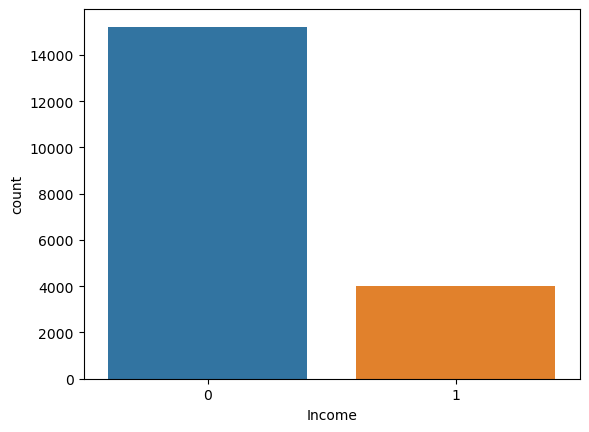

In [77]:
# check data imbalanced 
sns.countplot(data=df,x='Income')

In [ ]:
data is imbalnced we balanced data using smote method

In [78]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

In [79]:
om = SMOTE(sampling_strategy=0.80,random_state=355,k_neighbors=3)

In [81]:
x_train,x_test,y_train,y_test= train_test_split(scal,y,test_size=0.30,random_state=355)

In [85]:
Counter(y_train)

Counter({0: 10640, 1: 2815})

In [86]:
X_train,Y_train = om.fit_resample(x_train,y_train)
Counter(Y_train)

Counter({0: 10640, 1: 8512})

data is balanced .. we build models 

In [94]:
# import models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [95]:
# LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_pred = LR.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,y_pred))

Accuracy Score :
 0.7563724640194208


Confusion Score :
 [[3508 1070]
 [ 335  854]]


Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      4578
           1       0.44      0.72      0.55      1189

    accuracy                           0.76      5767
   macro avg       0.68      0.74      0.69      5767
weighted avg       0.82      0.76      0.77      5767



In [96]:
# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_pred = knn.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,knn_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,knn_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,knn_pred))

Accuracy Score :
 0.7693774926304838


Confusion Score :
 [[3600  978]
 [ 352  837]]


Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.79      0.84      4578
           1       0.46      0.70      0.56      1189

    accuracy                           0.77      5767
   macro avg       0.69      0.75      0.70      5767
weighted avg       0.82      0.77      0.78      5767



In [97]:
# baggingclassifier model
bg = BaggingClassifier()
bg.fit(X_train,Y_train)
bg_pred = bg.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,bg_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,bg_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,bg_pred))

Accuracy Score :
 0.8089127796081151


Confusion Score :
 [[4006  572]
 [ 530  659]]


Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4578
           1       0.54      0.55      0.54      1189

    accuracy                           0.81      5767
   macro avg       0.71      0.71      0.71      5767
weighted avg       0.81      0.81      0.81      5767



In [98]:
rmf = RandomForestClassifier()
rmf.fit(X_train,Y_train)
rmf_pred = rmf.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,rmf_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,rmf_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,rmf_pred))

Accuracy Score :
 0.8102999826599618


Confusion Score :
 [[3984  594]
 [ 500  689]]


Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4578
           1       0.54      0.58      0.56      1189

    accuracy                           0.81      5767
   macro avg       0.71      0.72      0.72      5767
weighted avg       0.82      0.81      0.81      5767



In [99]:
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
ada_pred = ada.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,ada_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,ada_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,ada_pred))

Accuracy Score :
 0.8059649731229409


Confusion Score :
 [[3722  856]
 [ 263  926]]


Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      4578
           1       0.52      0.78      0.62      1189

    accuracy                           0.81      5767
   macro avg       0.73      0.80      0.75      5767
weighted avg       0.85      0.81      0.82      5767



In [100]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
gbc_pred = gbc.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,gbc_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,gbc_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,gbc_pred))

Accuracy Score :
 0.8073521761747876


Confusion Score :
 [[3738  840]
 [ 271  918]]


Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.82      0.87      4578
           1       0.52      0.77      0.62      1189

    accuracy                           0.81      5767
   macro avg       0.73      0.79      0.75      5767
weighted avg       0.85      0.81      0.82      5767



In [101]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred = dt.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,dt_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,dt_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,dt_pred))

Accuracy Score :
 0.7809953181897


Confusion Score :
 [[3885  693]
 [ 570  619]]


Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4578
           1       0.47      0.52      0.50      1189

    accuracy                           0.78      5767
   macro avg       0.67      0.68      0.68      5767
weighted avg       0.79      0.78      0.78      5767



In [102]:
svc = SVC()
svc.fit(X_train,Y_train)
svc_pred = svc.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,svc_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,svc_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,svc_pred))

Accuracy Score :
 0.7752731056008323


Confusion Score :
 [[3474 1104]
 [ 192  997]]


Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.76      0.84      4578
           1       0.47      0.84      0.61      1189

    accuracy                           0.78      5767
   macro avg       0.71      0.80      0.72      5767
weighted avg       0.85      0.78      0.79      5767



check model is overfitting and underfitting using cross validation technique

In [103]:
LR_score = cross_val_score(LR,X_train,Y_train,cv=14)
print(LR_score)
print(LR_score.mean())
print(accuracy_score(y_test,y_pred) - LR_score.mean())

[0.73099415 0.74561404 0.73611111 0.74195906 0.73172515 0.72002924
 0.75804094 0.74122807 0.74926901 0.74634503 0.75219298 0.73976608
 0.75804094 0.74269006]
0.7424289891395154
0.013943474879905438


In [104]:
bg_score = cross_val_score(bg,X_train,Y_train,cv=14)
print(bg_score)
print(bg_score.mean())
print(accuracy_score(y_test,bg_pred) - bg_score.mean())

[0.73830409 0.76461988 0.76169591 0.7375731  0.80409357 0.89035088
 0.89619883 0.90789474 0.8998538  0.87573099 0.90497076 0.88961988
 0.88084795 0.87865497]
0.845029239766082
-0.03611646015796688


In [105]:
rmf_score = cross_val_score(rmf,X_train,Y_train,cv=14)
print(rmf_score)
print(rmf_score.mean())
print(accuracy_score(y_test,rmf_pred) - rmf_score.mean())

[0.77192982 0.7880117  0.78508772 0.77412281 0.82967836 0.89619883
 0.8998538  0.91959064 0.90935673 0.89181287 0.90350877 0.89766082
 0.87792398 0.89254386]
0.8598057644110277
-0.0495057817510659


In [106]:
gbc_score = cross_val_score(gbc,X_train,Y_train,cv=14)
print(gbc_score)
print(gbc_score.mean())
print(accuracy_score(y_test,gbc_pred) - gbc_score.mean())

[0.78654971 0.80774854 0.79020468 0.79824561 0.80628655 0.85453216
 0.86476608 0.83918129 0.86769006 0.85087719 0.85599415 0.85964912
 0.8377193  0.85818713]
0.8341165413533833
-0.026764365178595706


In [107]:
ada_score = cross_val_score(ada,X_train,Y_train,cv=14)
print(ada_score)
print(ada_score.mean())
print(accuracy_score(y_test,ada_pred) - ada_score.mean())

[0.77997076 0.80555556 0.79459064 0.79532164 0.79605263 0.82602339
 0.84064327 0.81871345 0.83625731 0.81725146 0.82894737 0.83918129
 0.81067251 0.83552632]
0.8160505430242273
-0.010085569901286395


In [108]:
knn_score = cross_val_score(knn,X_train,Y_train,cv=14)
print(knn_score)
print(knn_score.mean())
print(accuracy_score(y_test,knn_pred) - knn_score.mean())

[0.79166667 0.8245614  0.81578947 0.80628655 0.80263158 0.83406433
 0.84795322 0.8494152  0.85599415 0.82748538 0.84356725 0.84502924
 0.84356725 0.83552632]
0.8302527151211361
-0.06087522249065225


In [109]:
dt_score = cross_val_score(dt,X_train,Y_train,cv=14)
print(dt_score)
print(dt_score.mean())
print(accuracy_score(y_test,dt_pred) - dt_score.mean())

[0.72953216 0.74926901 0.75073099 0.7244152  0.77777778 0.86988304
 0.87865497 0.88011696 0.875      0.84868421 0.88377193 0.8625731
 0.87280702 0.85380117]
0.825501253132832
-0.04450593494313193


In [110]:
svc_score = cross_val_score(svc,X_train,Y_train,cv=14)
print(svc_score)
print(svc_score.mean())
print(accuracy_score(y_test,svc_pred) - svc_score.mean())

[0.78216374 0.81505848 0.79166667 0.79751462 0.79166667 0.82017544
 0.8245614  0.80921053 0.82017544 0.78947368 0.81432749 0.8128655
 0.79166667 0.80701754]
0.8048245614035087
-0.029551455802676374


# the best model is KNN  model

we increase accuracy using hyperparameter tuning 

In [112]:
params = {'n_neighbors':np.arange(1,10),
           'weights' : ['uniform', 'distance'],
           'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':np.arange(1,10)
             }

In [115]:
KNN = RandomizedSearchCV(estimator=knn,param_distributions=params,random_state=255,cv=15,scoring='accuracy')
KNN.fit(X_train,Y_train)
KNN.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'leaf_size': 6, 'algorithm': 'brute'}

In [116]:
Knn = KNeighborsClassifier(weights= 'distance', 
                           n_neighbors= 5, 
                           leaf_size= 6, 
                           algorithm= 'brute')
Knn.fit(X_train,Y_train)
Knn_pred = Knn.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,Knn_pred))
print('\n')
print('Confusion Score :\n',confusion_matrix(y_test,Knn_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,Knn_pred))

Accuracy Score :
 0.7780475117045258


Confusion Score :
 [[3754  824]
 [ 456  733]]


Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      4578
           1       0.47      0.62      0.53      1189

    accuracy                           0.78      5767
   macro avg       0.68      0.72      0.69      5767
weighted avg       0.80      0.78      0.79      5767



accuracy increase one percent

In [118]:
import pickle 
filename = 'income.pkl'
pickle.dump(Knn,open(filename,'wb'))

In [121]:
load = pickle.load(open('income.pkl','rb'))
load.score(x_test,y_test)

0.7780475117045258